In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

In [2]:
df=pd.read_csv('winequality-red.csv',sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [4]:
X=df.drop('quality',axis=1)
Y=df['quality']

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

In [6]:
mlp=MLPClassifier(activation='relu',max_iter=500)

In [7]:
mlp.fit(x_train,y_train)

MLPClassifier(max_iter=500)

In [8]:
y_pred=mlp.predict(x_test)

In [9]:
print('MLP Classifier Accuracy :',accuracy_score(y_test,y_pred))
print('Classification Report :\n',classification_report(y_test,y_pred))

MLP Classifier Accuracy : 0.559375
Classification Report :
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.73      0.66       130
           6       0.53      0.59      0.56       132
           7       0.46      0.14      0.22        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.26      0.24      0.24       320
weighted avg       0.52      0.56      0.53       320



C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\madha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


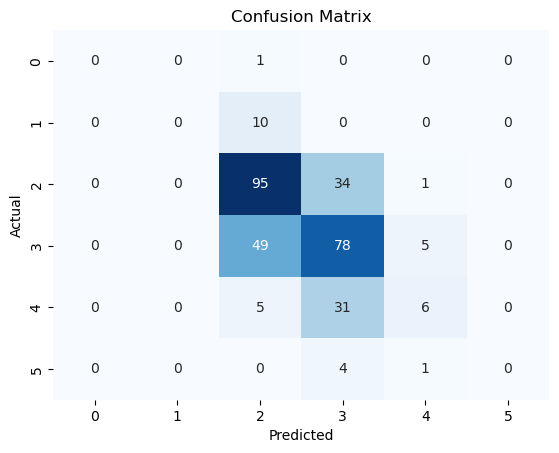

In [10]:
con=confusion_matrix(y_test,y_pred)
sns.heatmap(con,annot=True,cbar=False,cmap=plt.cm.Blues,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

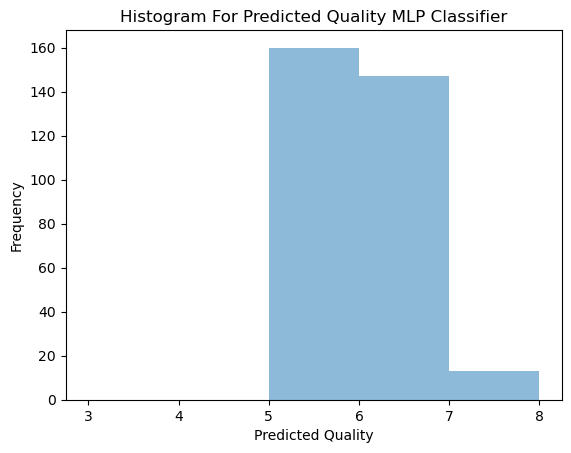

In [11]:
plt.hist(y_pred,bins=range(3,9),alpha=0.5)
plt.xlabel('Predicted Quality')
plt.ylabel('Frequency')
plt.title('Histogram For Predicted Quality MLP Classifier')
plt.show()

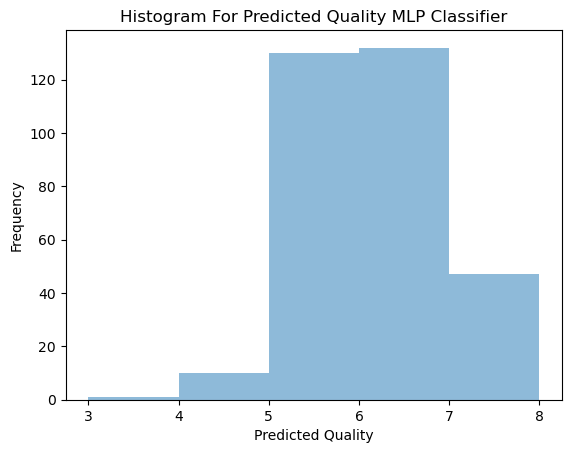

In [12]:
plt.hist(y_test,bins=range(3,9),alpha=0.5)
plt.xlabel('Predicted Quality')
plt.ylabel('Frequency')
plt.title('Histogram For Predicted Quality MLP Classifier')
plt.show()

In [13]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.preprocessing import StandardScaler
X_scale=StandardScaler().fit_transform(X)
kfold=KFold(n_splits=5,random_state=42,shuffle=True)
acc=cross_val_score(mlp,X_scale,Y,cv=kfold,scoring='accuracy')
acc=acc.mean()
acc

C:\Users\madha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\madha\anaconda3\lib\site-packages\sklearn\neural_network\_multi

0.6304075235109717